<a href="https://colab.research.google.com/github/wantepim84/NetworkX/blob/main/NetworkXCh2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

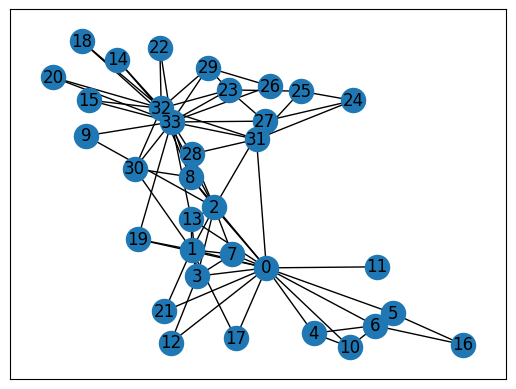

In [ ]:
#karate club example
G =nx.karate_club_graph()
karate_pos =nx.spring_layout (G, k=0.3)
nx.draw_networkx(G, karate_pos)

In [ ]:
#Accessing nodes and edges
list(G.nodes)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33]

In [ ]:
list(G.edges)

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 17),
 (0, 19),
 (0, 21),
 (0, 31),
 (1, 2),
 (1, 3),
 (1, 7),
 (1, 13),
 (1, 17),
 (1, 19),
 (1, 21),
 (1, 30),
 (2, 3),
 (2, 7),
 (2, 8),
 (2, 9),
 (2, 13),
 (2, 27),
 (2, 28),
 (2, 32),
 (3, 7),
 (3, 12),
 (3, 13),
 (4, 6),
 (4, 10),
 (5, 6),
 (5, 10),
 (5, 16),
 (6, 16),
 (8, 30),
 (8, 32),
 (8, 33),
 (9, 33),
 (13, 33),
 (14, 32),
 (14, 33),
 (15, 32),
 (15, 33),
 (18, 32),
 (18, 33),
 (19, 33),
 (20, 32),
 (20, 33),
 (22, 32),
 (22, 33),
 (23, 25),
 (23, 27),
 (23, 29),
 (23, 32),
 (23, 33),
 (24, 25),
 (24, 27),
 (24, 31),
 (25, 31),
 (26, 29),
 (26, 33),
 (27, 33),
 (28, 31),
 (28, 33),
 (29, 32),
 (29, 33),
 (30, 32),
 (30, 33),
 (31, 32),
 (31, 33),
 (32, 33)]

In [ ]:
#Checking if a particular no is present( use 'in' orperator or 'has_node' function)
mr_hi = 0
mr_hi in G

True

In [ ]:
G.has_node(mr_hi)

True

In [ ]:
wild_goose = 1337
wild_goose in G

False

In [ ]:
G.has_node(wild_goose)

False

In [ ]:
#Identify which edges are connected to a particular node(use 'neighbors' function)
list(G.neighbors(mr_hi))

[1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 17, 19, 21, 31]

In [ ]:
#verify neighbors ( use 'in' orperator or 'has_node' function)
member_1 = 1
(member_1, mr_hi) in G.edges

True

In [ ]:
G.has_edge(member_1, mr_hi)

True

In [ ]:
john_a = 33
(mr_hi, john_a) in G.edges

False

In [ ]:
G.has_edge(mr_hi, john_a)

False

In [ ]:
#Adding attributes to nodes and edges
member_club = [
    0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
    0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
    1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
    1, 1, 1, 1]

In [ ]:
for node_id in G.nodes:
  G.nodes[node_id]["club"] = member_club[node_id]

In [ ]:
#Attributes can also be added (use add_node())
G.add_node(11, club=0)

In [ ]:
#to check the value of that attribute for individual nodes
G.nodes[mr_hi]

{'club': 0}

In [ ]:
G.nodes[john_a]

{'club': 1}

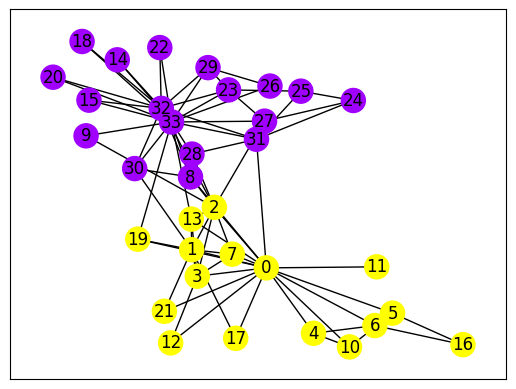

In [ ]:
node_color = [
    '#ffff00' if G.nodes[v]["club"] == 0
    else '#9f00ff' for v in G]
nx.draw_networkx(G, karate_pos, label=True, node_color=node_color)

In [ ]:
for v,w in G.edges:
 if G.nodes[v]["club"] == G.nodes[w]["club"]:
     G.edges[v,w]['same club'] = True
 else:
     G.edges[v,w]['same club'] = False

In [ ]:
internal = [e for e in G.edges if G.edges[e]["same club"]]
external = [e for e in G.edges if ~G.edges[e]["same club"]]

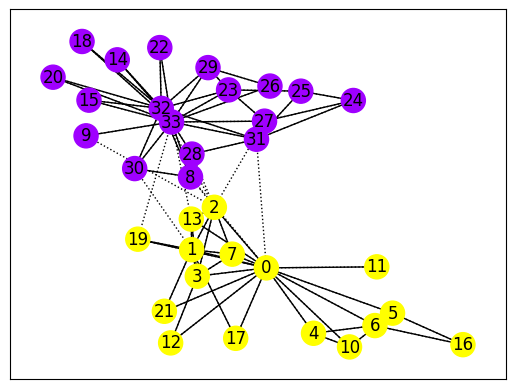

In [ ]:
#Draw nodes and node labels
nx.draw_networkx_nodes(G, karate_pos, node_color=node_color)
nx.draw_networkx_labels(G, karate_pos)
#Draw internal edges as solid line
nx.draw_networkx_edges(G, karate_pos, edgelist=internal)
#Draw external edges as dashed line
nx.draw_networkx_edges(G, karate_pos, edgelist=external, style='dotted')

In [ ]:
# Adding edges weights
def tie_strength(G, v, w):
  # Get neighbors of sets v and w in G
  v_neighbors = set(G.neighbors(v))
  w_neighbors = set(G.neighbors(w))
  # Return size of the set intersection
  return 1 + len(v_neighbors & w_neighbors)

In [ ]:
# Calculate weight for each edge
for v, w in G.edges:
    G.edges[v, w]['weight'] = tie_strength(G, v, w)
# Store weights in a list
edge_weights = [G.edges[v, w]['weight'] for v, w, in G.edges]

In [ ]:
# Use 'spring_layout' function to push strongly connected nodes tohgether
weighted_pos = nx.spring_layout(G, pos=karate_pos, k=0.3, weight='weight')

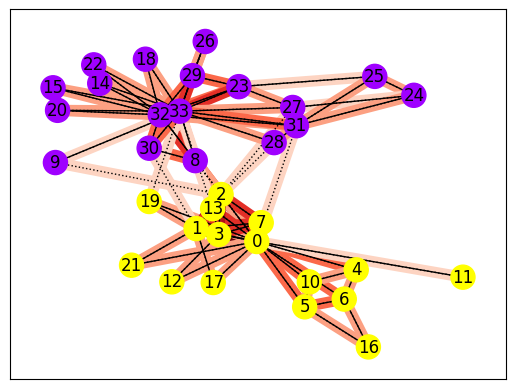

In [ ]:
#Visulaisation of weighted network
# Draw network with edge color determined by weight
nx.draw_networkx(
    G, weighted_pos, width=8, node_color=node_color,
    edge_color=edge_weights, edge_vmin=0, edge_vmax=6, edge_cmap=plt.cm.Reds)
# Draw solid/dashed lines on top of internal/external edges
nx.draw_networkx_edges(G, weighted_pos, edgelist=internal, edge_color="black")
nx.draw_networkx_edges(G, weighted_pos, edgelist=external, edge_color="black", style="dotted")

In [ ]:
#DiGraph Class
G_asymmetric = nx.DiGraph()
G_asymmetric.add_edge('A','B')
G_asymmetric.add_edge('A','D')
G_asymmetric.add_edge('C','A')
G_asymmetric.add_edge('D','E')
G_asymmetric.add_edge('E','H')
G_asymmetric.add_edge('H','D')
G_asymmetric.add_edge('C','E')
G_asymmetric.add_edge('A','E')
G_asymmetric.add_edge('F','B')
G_asymmetric.add_edge('C','G')
G_asymmetric.add_edge('H','A')
G_asymmetric.add_edge('D','I')
G_asymmetric.add_edge('F','H')
G_asymmetric.add_edge('I','D')
G_asymmetric.add_edge('K','E')
G_asymmetric.add_edge('A','K')

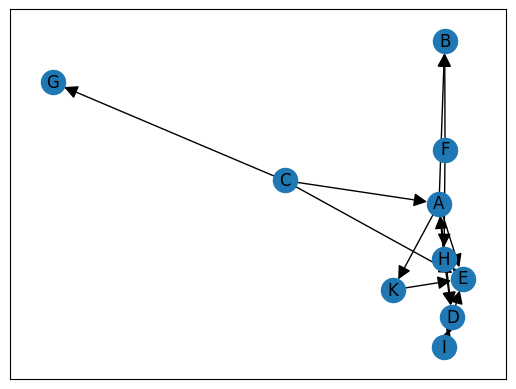

In [ ]:
nx.spring_layout(G_asymmetric)
nx.draw_networkx(G_asymmetric, arrowsize= 20)

In [ ]:
#list neighbors,successors, predeccesors
list(G_asymmetric.neighbors('A'))

['B', 'D', 'E', 'K']

In [ ]:
list(G_asymmetric.successors('F'))

['B', 'H']

In [ ]:
list(G_asymmetric.predecessors('B'))

['A', 'F']

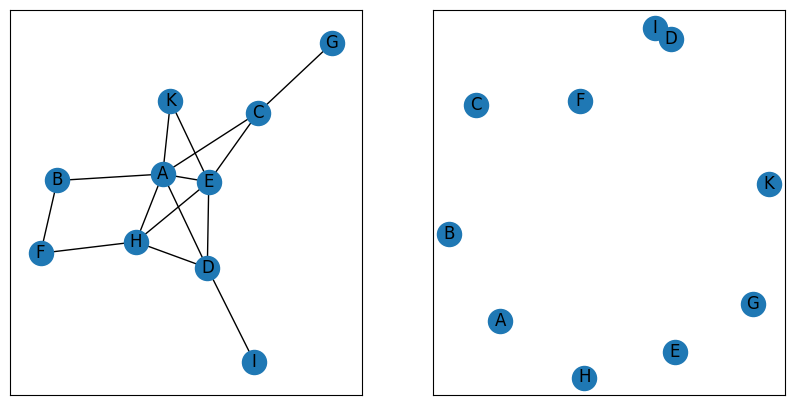

In [ ]:
# Create undirected copies of G_asymetric
A=1
G_either = G_asymmetric.to_undirected()
G_both = G_asymmetric.to_undirected(reciprocal=True)
# Set up a figure
plt.figure(figsize=(10,5))
# Draw G_either on left
plt.subplot(1, 2, 1)
nx.draw_networkx(G_either)
# Draw G_both on right
plt.subplot(1, 2, 2)
nx.draw_networkx(G_both)

In [ ]:
#MultiGraph and MultiDiGraph – parallel edges
# The seven bridges of Königsberg
G = nx.MultiGraph()
G.add_edges_from([
    ("North Bank", "Kneiphof", {"bridge": "Krämerbrücke"}),
    ("North Bank", "Kneiphof", {"bridge": "Schmiedebrücke"}),
    ("North Bank", "Lomse",    {"bridge": "Holzbrücke"}),
    ("Lomse",      "Kneiphof", {"bridge": "Dombrücke"}),
    ("South Bank", "Kneiphof", {"bridge": "Grüne Brücke"}),
    ("South Bank", "Kneiphof", {"bridge": "Köttelbrücke"}),
    ("South Bank", "Lomse",    {"bridge": "Hohe Brücke"})
])

[0, 1, 0, 0, 0, 1, 0]

In [ ]:
list(G.edges)[0]

('North Bank', 'Kneiphof', 0)

In [ ]:
G.edges['North Bank', 'Kneiphof', 0]

{'bridge': 'Krämerbrücke'}